# Análisis Exploratorio de Datos - Formula 1

## Objetivo

Este notebook presenta un análisis exploratorio detallado de los datasets de Formula 1 con el fin de comprender la estructura, calidad y características principales de los datos disponibles para el proyecto de machine learning.

## Contenido

1. Configuración del entorno
2. Carga de datos
3. Análisis de estructura
4. Análisis de datos faltantes
5. Detección de duplicados
6. Análisis de distribuciones
7. Correlaciones
8. Conclusiones del análisis

## 1. Configuración del Entorno

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("Librerías cargadas exitosamente")
print(f"Versión de pandas: {pd.__version__}")
print(f"Versión de numpy: {np.__version__}")

Librerías cargadas exitosamente
Versión de pandas: 2.3.0
Versión de numpy: 1.26.4


## 2. Carga de Datos

In [2]:
# Ruta de los datos
DATA_PATH = '../data/01_raw/'

# Diccionario para almacenar los datasets
datasets = {}

# Lista de archivos a cargar
files_to_load = [
    'Driver_Details.csv',
    'Driver_Rankings.csv',
    'Constructor_Performance.csv',
    'Constructor_Rankings.csv',
    'Race_Results.csv',
    'Qualifying_Results.csv',
    'Lap_Timings.csv',
    'Pit_Stop_Records.csv',
    'Race_Schedule.csv',
    'Race_Status.csv',
    'Season_Summaries.csv',
    'Sprint_Race_Results.csv',
    'Team_Details.csv',
    'Track_Information.csv'
]

# Carga de datasets
print("Cargando datasets...\n")
for file in files_to_load:
    dataset_name = file.replace('.csv', '').lower()
    try:
        datasets[dataset_name] = pd.read_csv(DATA_PATH + file)
        print(f"[OK] {file} - {len(datasets[dataset_name]):,} registros")
    except Exception as e:
        print(f"[ERROR] {file}: {e}")

print(f"\nTotal de datasets cargados: {len(datasets)}")

Cargando datasets...

[OK] Driver_Details.csv - 859 registros
[OK] Driver_Rankings.csv - 34,595 registros
[OK] Constructor_Performance.csv - 12,505 registros
[OK] Constructor_Rankings.csv - 13,271 registros
[OK] Race_Results.csv - 26,519 registros
[OK] Qualifying_Results.csv - 10,254 registros
[OK] Lap_Timings.csv - 575,029 registros
[OK] Pit_Stop_Records.csv - 10,990 registros
[OK] Race_Schedule.csv - 1,125 registros
[OK] Race_Status.csv - 139 registros
[OK] Season_Summaries.csv - 75 registros
[OK] Sprint_Race_Results.csv - 300 registros
[OK] Team_Details.csv - 212 registros
[OK] Track_Information.csv - 77 registros

Total de datasets cargados: 14


## 3. Análisis de Estructura de Datos

### 3.1 Resumen General de Datasets

In [3]:
# Resumen de estructura de cada dataset
estructura_resumen = []

for nombre, df in datasets.items():
    estructura_resumen.append({
        'Dataset': nombre,
        'Filas': df.shape[0],
        'Columnas': df.shape[1],
        'Memoria (MB)': df.memory_usage(deep=True).sum() / 1024**2,
        'Cols_Numéricas': df.select_dtypes(include=[np.number]).shape[1],
        'Cols_Texto': df.select_dtypes(include=['object']).shape[1],
        'Cols_Fecha': df.select_dtypes(include=['datetime']).shape[1]
    })

df_estructura = pd.DataFrame(estructura_resumen)
df_estructura = df_estructura.sort_values('Filas', ascending=False)

print("RESUMEN DE ESTRUCTURA DE DATASETS")
print("="*80)
print(df_estructura.to_string(index=False))

print(f"\nMemoria total utilizada: {df_estructura['Memoria (MB)'].sum():.2f} MB")
print(f"Total de registros: {df_estructura['Filas'].sum():,}")

RESUMEN DE ESTRUCTURA DE DATASETS
                Dataset  Filas  Columnas  Memoria (MB)  Cols_Numéricas  Cols_Texto  Cols_Fecha
            lap_timings 575029         6        53.195               5           1           0
        driver_rankings  34595         7         3.257               6           1           0
           race_results  26519        18        13.549               9           9           0
   constructor_rankings  13271         7         1.244               6           1           0
constructor_performance  12505         5         0.990               4           1           0
       pit_stop_records  10990         7         1.595               5           2           0
     qualifying_results  10254         9         2.075               6           3           0
          race_schedule   1125        18         0.888               4          14           0
         driver_details    859         9         0.399               1           8           0
    sprint_race_

### 3.2 Análisis Detallado por Dataset

In [4]:
def analizar_tipos_datos(df, nombre):
    """Análisis detallado de tipos de datos de un dataset"""
    print(f"\nANÁLISIS DE TIPOS DE DATOS: {nombre.upper()}")
    print("-"*60)
    
    # Información de columnas
    info_columnas = pd.DataFrame({
        'Columna': df.columns,
        'Tipo': df.dtypes.values,
        'No_Nulos': df.count().values,
        'Nulos': df.isnull().sum().values,
        '%_Nulos': (df.isnull().sum().values / len(df) * 100).round(2),
        'Únicos': [df[col].nunique() for col in df.columns]
    })
    
    print(info_columnas.to_string(index=False))
    return info_columnas

# Analizar datasets principales
datasets_principales = ['race_results', 'driver_details', 'lap_timings', 'qualifying_results']

for dataset_name in datasets_principales:
    if dataset_name in datasets:
        analizar_tipos_datos(datasets[dataset_name], dataset_name)


ANÁLISIS DE TIPOS DE DATOS: RACE_RESULTS
------------------------------------------------------------
        Columna    Tipo  No_Nulos  Nulos  %_Nulos  Únicos
       resultId   int64     26519      0    0.000   26519
         raceId   int64     26519      0    0.000    1113
       driverId   int64     26519      0    0.000     859
  constructorId   int64     26519      0    0.000     211
         number  object     26519      0    0.000     130
           grid   int64     26519      0    0.000      35
       position  object     26519      0    0.000      34
   positionText  object     26519      0    0.000      39
  positionOrder   int64     26519      0    0.000      39
         points float64     26519      0    0.000      39
           laps   int64     26519      0    0.000     172
           time  object     26519      0    0.000    7272
   milliseconds  object     26519      0    0.000    7493
     fastestLap  object     26519      0    0.000      81
           rank  object    

## 4. Análisis de Datos Faltantes

In [5]:
# Análisis de valores nulos por dataset
print("ANÁLISIS DE DATOS FALTANTES")
print("="*80)

resumen_nulos = []

for nombre, df in datasets.items():
    total_celdas = df.shape[0] * df.shape[1]
    celdas_nulas = df.isnull().sum().sum()
    porcentaje_nulos = (celdas_nulas / total_celdas * 100) if total_celdas > 0 else 0
    
    resumen_nulos.append({
        'Dataset': nombre,
        'Total_Celdas': total_celdas,
        'Celdas_Nulas': celdas_nulas,
        '%_Nulos': porcentaje_nulos,
        'Columnas_con_Nulos': (df.isnull().sum() > 0).sum()
    })

df_nulos = pd.DataFrame(resumen_nulos)
df_nulos = df_nulos.sort_values('%_Nulos', ascending=False)

print(df_nulos.to_string(index=False))

ANÁLISIS DE DATOS FALTANTES
                Dataset  Total_Celdas  Celdas_Nulas  %_Nulos  Columnas_con_Nulos
     qualifying_results         92286            40    0.043                   2
         driver_details          7731             0    0.000                   0
        driver_rankings        242165             0    0.000                   0
constructor_performance         62525             0    0.000                   0
   constructor_rankings         92897             0    0.000                   0
           race_results        477342             0    0.000                   0
            lap_timings       3450174             0    0.000                   0
       pit_stop_records         76930             0    0.000                   0
          race_schedule         20250             0    0.000                   0
            race_status           278             0    0.000                   0
       season_summaries           150             0    0.000                   0


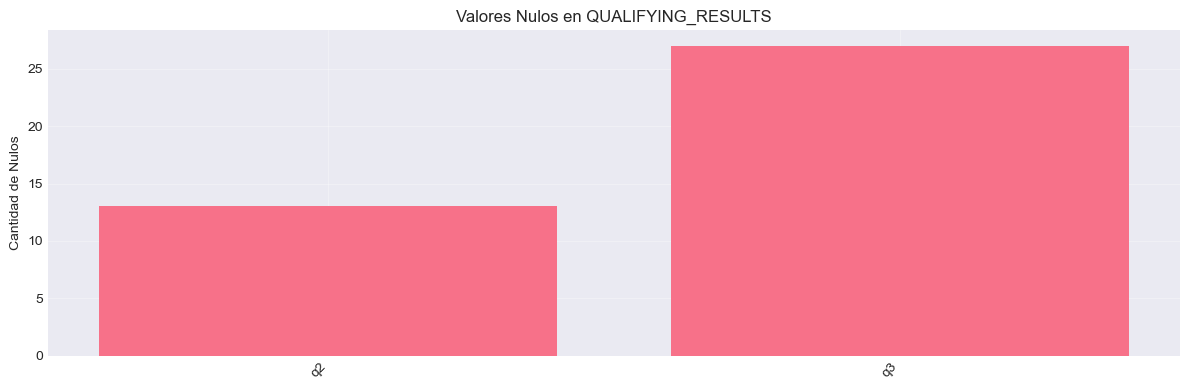

In [6]:
# Visualización de datos faltantes para datasets con nulos
datasets_con_nulos = df_nulos[df_nulos['%_Nulos'] > 0]['Dataset'].tolist()

if datasets_con_nulos:
    fig, axes = plt.subplots(len(datasets_con_nulos), 1, figsize=(12, 4*len(datasets_con_nulos)))
    if len(datasets_con_nulos) == 1:
        axes = [axes]
    
    for idx, dataset_name in enumerate(datasets_con_nulos):
        df = datasets[dataset_name]
        nulos_por_columna = df.isnull().sum()
        nulos_por_columna = nulos_por_columna[nulos_por_columna > 0]
        
        if len(nulos_por_columna) > 0:
            axes[idx].bar(range(len(nulos_por_columna)), nulos_por_columna.values)
            axes[idx].set_xticks(range(len(nulos_por_columna)))
            axes[idx].set_xticklabels(nulos_por_columna.index, rotation=45, ha='right')
            axes[idx].set_title(f'Valores Nulos en {dataset_name.upper()}')
            axes[idx].set_ylabel('Cantidad de Nulos')
            axes[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("\nNo se encontraron datasets con valores nulos significativos.")

## 5. Detección de Datos Duplicados

In [7]:
print("ANÁLISIS DE DATOS DUPLICADOS")
print("="*80)

resumen_duplicados = []

for nombre, df in datasets.items():
    # Duplicados completos
    duplicados_completos = df.duplicated().sum()
    
    # Identificar columnas clave potenciales (IDs)
    columnas_id = [col for col in df.columns if 'id' in col.lower() or 'Id' in col]
    
    duplicados_por_id = 0
    columna_id_principal = None
    
    if columnas_id:
        columna_id_principal = columnas_id[0]
        duplicados_por_id = df[columna_id_principal].duplicated().sum()
    
    resumen_duplicados.append({
        'Dataset': nombre,
        'Total_Filas': len(df),
        'Duplicados_Completos': duplicados_completos,
        '%_Duplicados': (duplicados_completos / len(df) * 100) if len(df) > 0 else 0,
        'Columna_ID': columna_id_principal if columna_id_principal else 'N/A',
        'Duplicados_ID': duplicados_por_id
    })

df_duplicados = pd.DataFrame(resumen_duplicados)
df_duplicados = df_duplicados.sort_values('%_Duplicados', ascending=False)

print(df_duplicados.to_string(index=False))

# Análisis de datasets con duplicados
datasets_con_duplicados = df_duplicados[df_duplicados['Duplicados_Completos'] > 0]['Dataset'].tolist()

if datasets_con_duplicados:
    print("\nDETALLE DE DUPLICADOS ENCONTRADOS:")
    print("-"*60)
    for dataset_name in datasets_con_duplicados:
        df = datasets[dataset_name]
        duplicados = df[df.duplicated(keep='first')]
        print(f"\n{dataset_name.upper()}: {len(duplicados)} filas duplicadas")
        if len(duplicados) > 0 and len(duplicados) <= 5:
            print("Primeras filas duplicadas:")
            print(duplicados.head())

ANÁLISIS DE DATOS DUPLICADOS
                Dataset  Total_Filas  Duplicados_Completos  %_Duplicados             Columna_ID  Duplicados_ID
         driver_details          859                     0         0.000               driverId              0
        driver_rankings        34595                     0         0.000      driverStandingsId              0
constructor_performance        12505                     0         0.000   constructorResultsId              0
   constructor_rankings        13271                     0         0.000 constructorStandingsId              0
           race_results        26519                     0         0.000               resultId              0
     qualifying_results        10254                     0         0.000              qualifyId              0
            lap_timings       575029                     0         0.000                 raceId         574498
       pit_stop_records        10990                     0         0.000           

## 6. Análisis de Distribuciones

### 6.1 Distribuciones de Variables Numéricas Clave

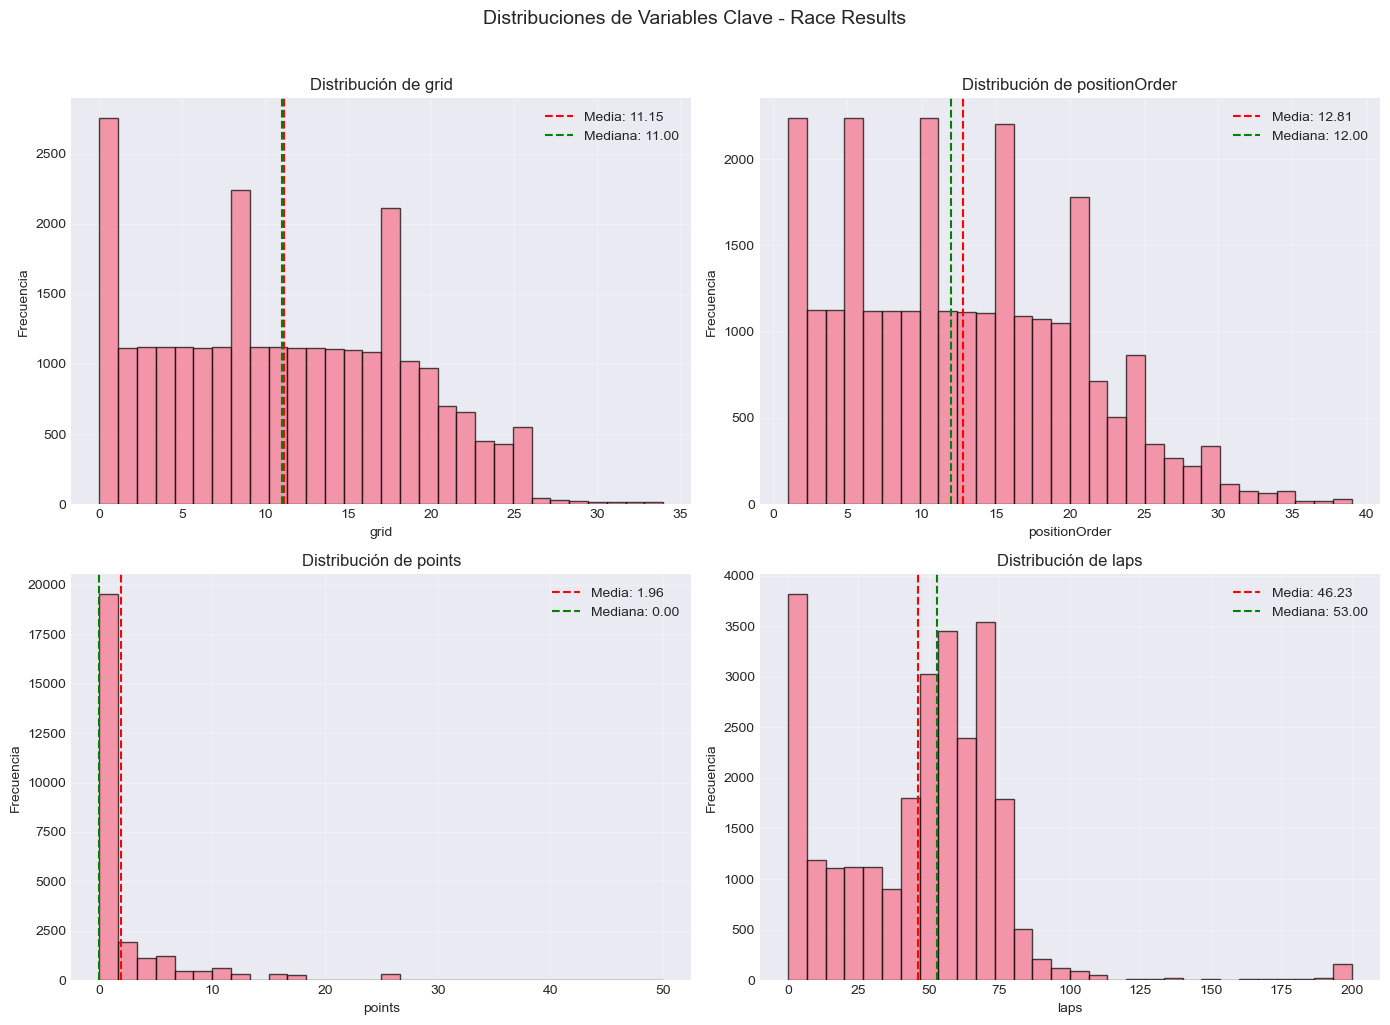


ESTADÍSTICAS DESCRIPTIVAS - RACE RESULTS
           grid  positionOrder    points      laps
count 26519.000      26519.000 26519.000 26519.000
mean     11.146         12.815     1.960    46.228
std       7.213          7.678     4.306    29.578
min       0.000          1.000     0.000     0.000
25%       5.000          6.000     0.000    23.000
50%      11.000         12.000     0.000    53.000
75%      17.000         18.000     2.000    66.000
max      34.000         39.000    50.000   200.000


In [8]:
# Análisis de distribuciones para Race Results
if 'race_results' in datasets:
    df_race = datasets['race_results']
    
    # Seleccionar columnas numéricas relevantes
    columnas_numericas = ['grid', 'positionOrder', 'points', 'laps']
    columnas_disponibles = [col for col in columnas_numericas if col in df_race.columns]
    
    if columnas_disponibles:
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        axes = axes.flatten()
        
        for idx, col in enumerate(columnas_disponibles[:4]):
            # Histograma
            axes[idx].hist(df_race[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
            axes[idx].set_title(f'Distribución de {col}')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Frecuencia')
            axes[idx].grid(True, alpha=0.3)
            
            # Estadísticas
            mean_val = df_race[col].mean()
            median_val = df_race[col].median()
            axes[idx].axvline(mean_val, color='red', linestyle='--', label=f'Media: {mean_val:.2f}')
            axes[idx].axvline(median_val, color='green', linestyle='--', label=f'Mediana: {median_val:.2f}')
            axes[idx].legend()
        
        plt.suptitle('Distribuciones de Variables Clave - Race Results', fontsize=14, y=1.02)
        plt.tight_layout()
        plt.show()
        
        # Estadísticas descriptivas
        print("\nESTADÍSTICAS DESCRIPTIVAS - RACE RESULTS")
        print("="*80)
        print(df_race[columnas_disponibles].describe())

AttributeError: 'Index' object has no attribute 'sorted'

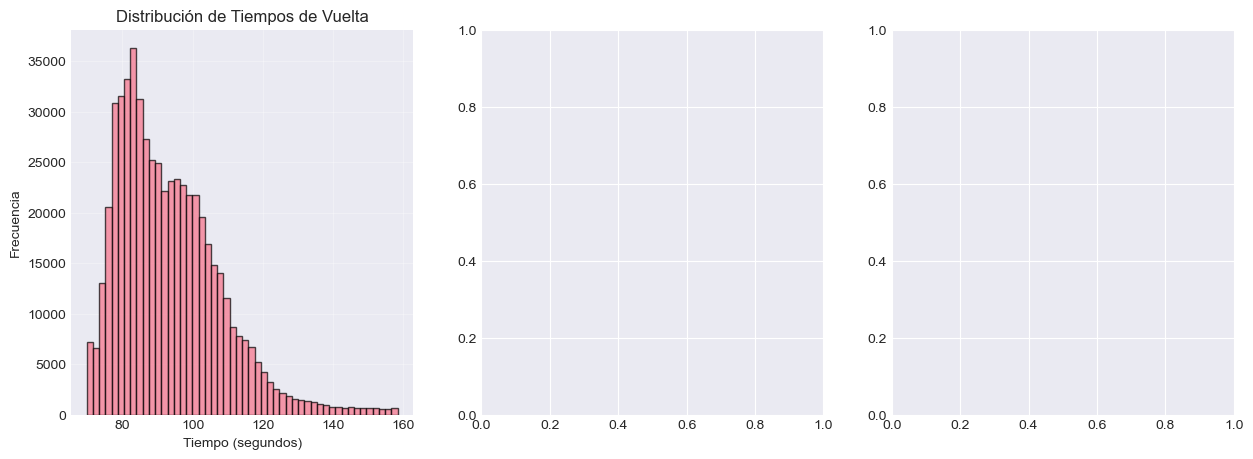

In [9]:
# Análisis de distribuciones para Lap Timings
if 'lap_timings' in datasets:
    df_laps = datasets['lap_timings']
    
    # Convertir tiempo a segundos para análisis
    if 'milliseconds' in df_laps.columns:
        df_laps['seconds'] = df_laps['milliseconds'] / 1000
        
        # Filtrar valores extremos para mejor visualización
        q1 = df_laps['seconds'].quantile(0.01)
        q99 = df_laps['seconds'].quantile(0.99)
        df_laps_filtered = df_laps[(df_laps['seconds'] >= q1) & (df_laps['seconds'] <= q99)]
        
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # Histograma de tiempos
        axes[0].hist(df_laps_filtered['seconds'], bins=50, edgecolor='black', alpha=0.7)
        axes[0].set_title('Distribución de Tiempos de Vuelta')
        axes[0].set_xlabel('Tiempo (segundos)')
        axes[0].set_ylabel('Frecuencia')
        axes[0].grid(True, alpha=0.3)
        
        # Boxplot de tiempos por posición
        if 'position' in df_laps.columns:
            positions_to_plot = df_laps_filtered['position'].value_counts().head(10).index.sorted()
            data_for_box = [df_laps_filtered[df_laps_filtered['position'] == pos]['seconds'].values 
                           for pos in positions_to_plot]
            axes[1].boxplot(data_for_box, labels=positions_to_plot)
            axes[1].set_title('Tiempos de Vuelta por Posición')
            axes[1].set_xlabel('Posición')
            axes[1].set_ylabel('Tiempo (segundos)')
            axes[1].grid(True, alpha=0.3)
        
        # Distribución de número de vueltas
        if 'lap' in df_laps.columns:
            axes[2].hist(df_laps.groupby('raceId')['lap'].max(), bins=30, edgecolor='black', alpha=0.7)
            axes[2].set_title('Distribución de Número de Vueltas por Carrera')
            axes[2].set_xlabel('Número de Vueltas')
            axes[2].set_ylabel('Frecuencia')
            axes[2].grid(True, alpha=0.3)
        
        plt.suptitle('Análisis de Tiempos de Vuelta', fontsize=14, y=1.02)
        plt.tight_layout()
        plt.show()
        
        print("\nESTADÍSTICAS DE TIEMPOS DE VUELTA")
        print("="*80)
        print(f"Tiempo promedio: {df_laps_filtered['seconds'].mean():.2f} segundos")
        print(f"Tiempo mediano: {df_laps_filtered['seconds'].median():.2f} segundos")
        print(f"Desviación estándar: {df_laps_filtered['seconds'].std():.2f} segundos")
        print(f"Tiempo mínimo: {df_laps_filtered['seconds'].min():.2f} segundos")
        print(f"Tiempo máximo: {df_laps_filtered['seconds'].max():.2f} segundos")

### 6.2 Análisis de Variables Categóricas

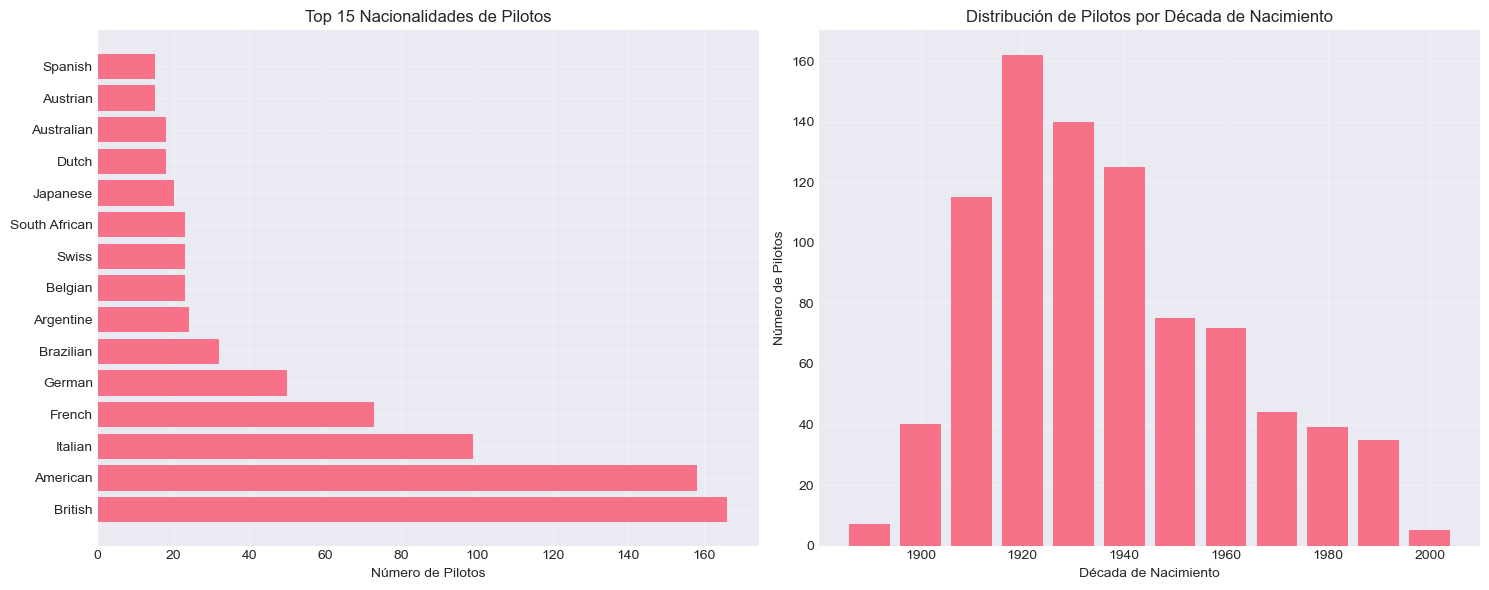

In [10]:
# Análisis de nacionalidades de pilotos
if 'driver_details' in datasets:
    df_drivers = datasets['driver_details']
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Top nacionalidades
    if 'nationality' in df_drivers.columns:
        top_nationalities = df_drivers['nationality'].value_counts().head(15)
        axes[0].barh(range(len(top_nationalities)), top_nationalities.values)
        axes[0].set_yticks(range(len(top_nationalities)))
        axes[0].set_yticklabels(top_nationalities.index)
        axes[0].set_xlabel('Número de Pilotos')
        axes[0].set_title('Top 15 Nacionalidades de Pilotos')
        axes[0].grid(True, alpha=0.3)
    
    # Distribución temporal de pilotos (por década de nacimiento)
    if 'dob' in df_drivers.columns:
        df_drivers['dob'] = pd.to_datetime(df_drivers['dob'], errors='coerce')
        df_drivers['birth_decade'] = (df_drivers['dob'].dt.year // 10) * 10
        decade_counts = df_drivers['birth_decade'].value_counts().sort_index()
        
        axes[1].bar(decade_counts.index, decade_counts.values, width=8)
        axes[1].set_xlabel('Década de Nacimiento')
        axes[1].set_ylabel('Número de Pilotos')
        axes[1].set_title('Distribución de Pilotos por Década de Nacimiento')
        axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


ANÁLISIS DE CONSTRUCTORES/EQUIPOS
Total de equipos en la historia: 212

Distribución por nacionalidad:
  British: 86 equipos
  American: 39 equipos
  Italian: 30 equipos
  French: 13 equipos
  German: 10 equipos
  Japanese: 5 equipos
  Swiss: 5 equipos
  South African: 3 equipos
  Dutch: 3 equipos
  Canadian: 2 equipos


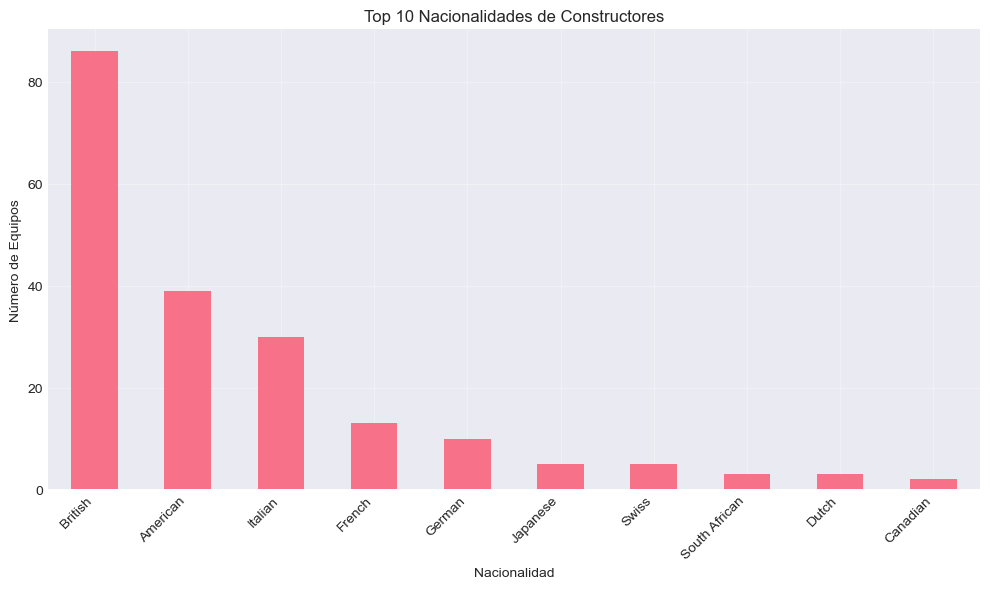

In [11]:
# Análisis de constructores
if 'team_details' in datasets:
    df_teams = datasets['team_details']
    
    print("\nANÁLISIS DE CONSTRUCTORES/EQUIPOS")
    print("="*80)
    print(f"Total de equipos en la historia: {len(df_teams)}")
    
    if 'nationality' in df_teams.columns:
        print("\nDistribución por nacionalidad:")
        nationality_dist = df_teams['nationality'].value_counts().head(10)
        for nat, count in nationality_dist.items():
            print(f"  {nat}: {count} equipos")
        
        # Visualización
        plt.figure(figsize=(10, 6))
        nationality_dist.plot(kind='bar')
        plt.title('Top 10 Nacionalidades de Constructores')
        plt.xlabel('Nacionalidad')
        plt.ylabel('Número de Equipos')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

## 7. Análisis de Correlaciones

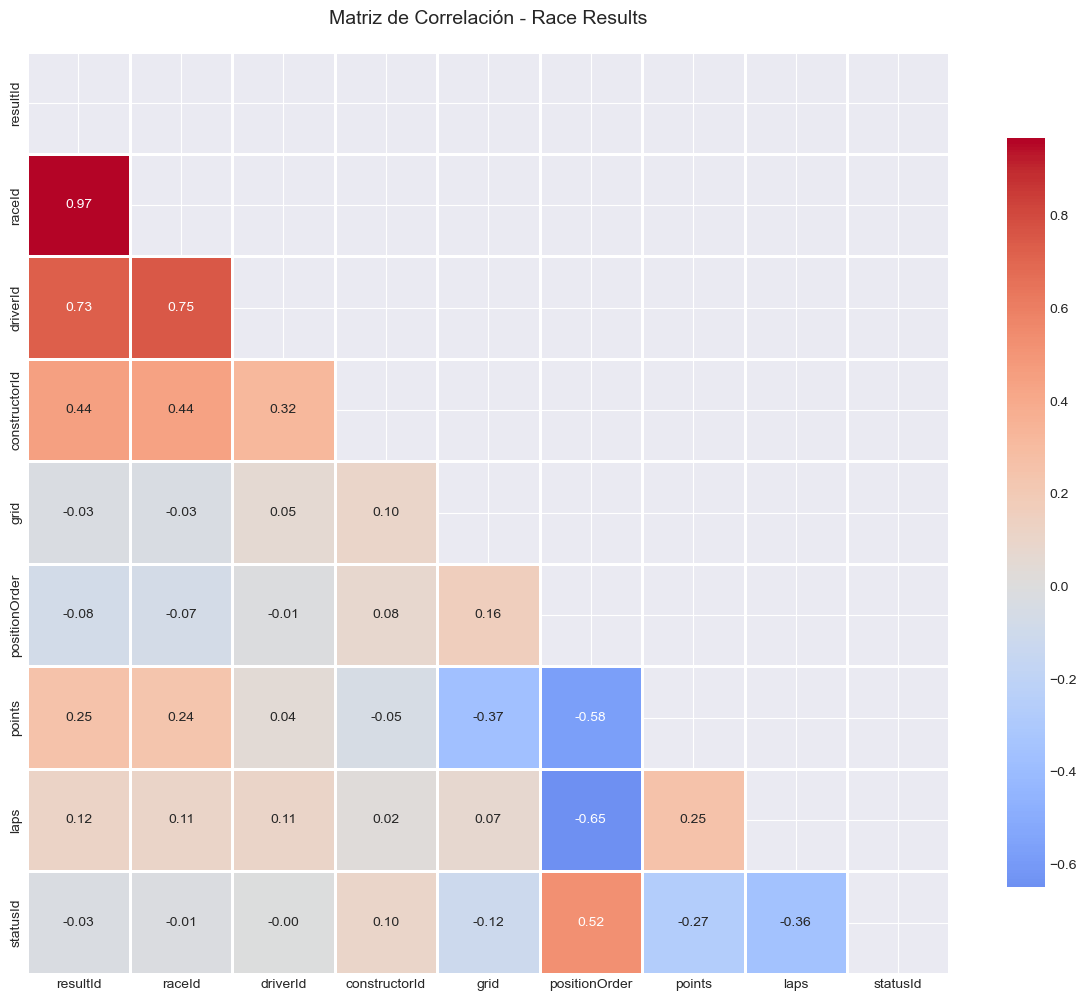


CORRELACIONES MÁS FUERTES (|r| > 0.5)
   Variable 1 Variable 2  Correlación
     resultId     raceId        0.968
       raceId   driverId        0.749
     resultId   driverId        0.729
positionOrder       laps       -0.650
positionOrder     points       -0.575
positionOrder   statusId        0.525


In [12]:
# Matriz de correlación para Race Results
if 'race_results' in datasets:
    df_race = datasets['race_results']
    
    # Seleccionar solo columnas numéricas
    columnas_numericas = df_race.select_dtypes(include=[np.number]).columns.tolist()
    
    if len(columnas_numericas) > 1:
        # Calcular matriz de correlación
        correlation_matrix = df_race[columnas_numericas].corr()
        
        # Visualizar matriz de correlación
        plt.figure(figsize=(12, 10))
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
                   cmap='coolwarm', center=0, square=True, linewidths=1,
                   cbar_kws={"shrink": 0.8})
        plt.title('Matriz de Correlación - Race Results', fontsize=14, pad=20)
        plt.tight_layout()
        plt.show()
        
        # Correlaciones más fuertes
        print("\nCORRELACIONES MÁS FUERTES (|r| > 0.5)")
        print("="*80)
        
        # Obtener pares de correlaciones
        corr_pairs = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                corr_value = correlation_matrix.iloc[i, j]
                if abs(corr_value) > 0.5 and not np.isnan(corr_value):
                    corr_pairs.append({
                        'Variable 1': correlation_matrix.columns[i],
                        'Variable 2': correlation_matrix.columns[j],
                        'Correlación': corr_value
                    })
        
        if corr_pairs:
            df_corr = pd.DataFrame(corr_pairs)
            df_corr = df_corr.sort_values('Correlación', key=abs, ascending=False)
            print(df_corr.to_string(index=False))
        else:
            print("No se encontraron correlaciones fuertes (|r| > 0.5)")

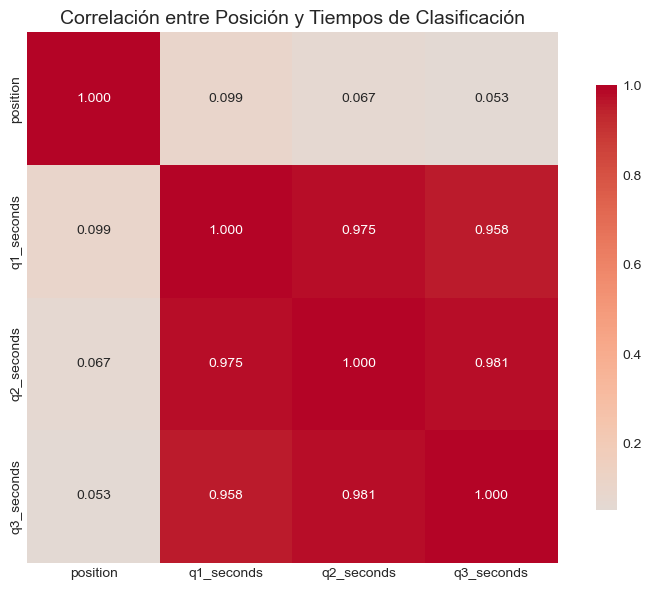


ANÁLISIS DE CORRELACIÓN - QUALIFYING
Interpretación:
- Correlación negativa esperada entre posición y tiempos (menor tiempo = mejor posición)
- Q3 debería tener la correlación más fuerte con la posición final


In [13]:
# Análisis de correlación para Qualifying Results
if 'qualifying_results' in datasets:
    df_qual = datasets['qualifying_results']
    
    # Convertir tiempos de clasificación a segundos si es posible
    for q_session in ['q1', 'q2', 'q3']:
        if q_session in df_qual.columns:
            # Intentar convertir formato MM:SS.sss a segundos
            def time_to_seconds(time_str):
                try:
                    if pd.isna(time_str) or time_str == '\\N':
                        return np.nan
                    parts = str(time_str).split(':')
                    if len(parts) == 2:
                        minutes = float(parts[0])
                        seconds = float(parts[1])
                        return minutes * 60 + seconds
                    else:
                        return np.nan
                except:
                    return np.nan
            
            df_qual[f'{q_session}_seconds'] = df_qual[q_session].apply(time_to_seconds)
    
    # Seleccionar columnas numéricas para correlación
    cols_for_corr = ['position', 'q1_seconds', 'q2_seconds', 'q3_seconds']
    cols_available = [col for col in cols_for_corr if col in df_qual.columns]
    
    if len(cols_available) > 1:
        corr_matrix_qual = df_qual[cols_available].corr()
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix_qual, annot=True, fmt='.3f', 
                   cmap='coolwarm', center=0, square=True,
                   cbar_kws={"shrink": 0.8})
        plt.title('Correlación entre Posición y Tiempos de Clasificación', fontsize=14)
        plt.tight_layout()
        plt.show()
        
        print("\nANÁLISIS DE CORRELACIÓN - QUALIFYING")
        print("="*80)
        print("Interpretación:")
        print("- Correlación negativa esperada entre posición y tiempos (menor tiempo = mejor posición)")
        print("- Q3 debería tener la correlación más fuerte con la posición final")

## 8. Análisis de Calidad de Datos Global

RESUMEN DE CALIDAD DE DATOS
                Dataset  Completitud (%)  Duplicados   Calidad
         driver_details          100.000           0 Excelente
        driver_rankings          100.000           0 Excelente
constructor_performance          100.000           0 Excelente
   constructor_rankings          100.000           0 Excelente
           race_results          100.000           0 Excelente
            lap_timings          100.000           0 Excelente
       pit_stop_records          100.000           0 Excelente
          race_schedule          100.000           0 Excelente
            race_status          100.000           0 Excelente
       season_summaries          100.000           0 Excelente
    sprint_race_results          100.000           0 Excelente
           team_details          100.000           0 Excelente
      track_information          100.000           0 Excelente
     qualifying_results           90.639           0 Aceptable


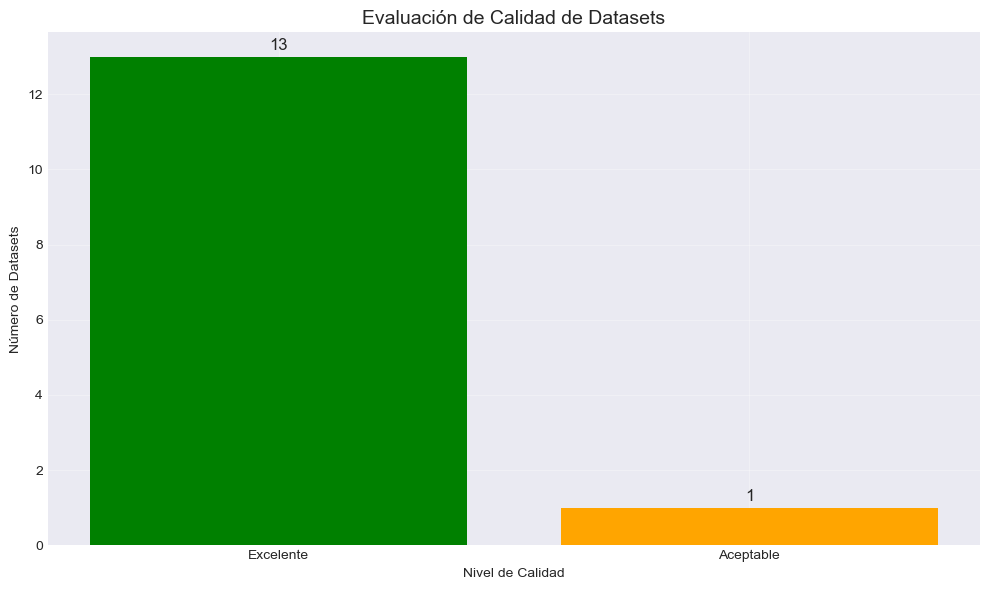

In [14]:
# Resumen de calidad de datos
print("RESUMEN DE CALIDAD DE DATOS")
print("="*80)

calidad_resumen = []

for nombre, df in datasets.items():
    total_celdas = df.shape[0] * df.shape[1]
    celdas_nulas = df.isnull().sum().sum()
    completitud = ((total_celdas - celdas_nulas) / total_celdas * 100) if total_celdas > 0 else 0
    duplicados = df.duplicated().sum()
    
    # Determinar calidad
    if completitud >= 98 and duplicados == 0:
        calidad = 'Excelente'
    elif completitud >= 95 and duplicados < df.shape[0] * 0.01:
        calidad = 'Buena'
    elif completitud >= 90:
        calidad = 'Aceptable'
    else:
        calidad = 'Requiere Atención'
    
    calidad_resumen.append({
        'Dataset': nombre,
        'Completitud (%)': completitud,
        'Duplicados': duplicados,
        'Calidad': calidad
    })

df_calidad = pd.DataFrame(calidad_resumen)
df_calidad = df_calidad.sort_values('Completitud (%)', ascending=False)

print(df_calidad.to_string(index=False))

# Gráfico de calidad
calidad_counts = df_calidad['Calidad'].value_counts()

plt.figure(figsize=(10, 6))
colors = {'Excelente': 'green', 'Buena': 'yellowgreen', 
          'Aceptable': 'orange', 'Requiere Atención': 'red'}
bar_colors = [colors.get(x, 'gray') for x in calidad_counts.index]
plt.bar(calidad_counts.index, calidad_counts.values, color=bar_colors)
plt.title('Evaluación de Calidad de Datasets', fontsize=14)
plt.xlabel('Nivel de Calidad')
plt.ylabel('Número de Datasets')
plt.grid(True, alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(calidad_counts.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

## 9. Análisis Temporal de los Datos


ANÁLISIS TEMPORAL DE DATOS
Rango temporal de datos: 1950 - 2024
Total de años: 75


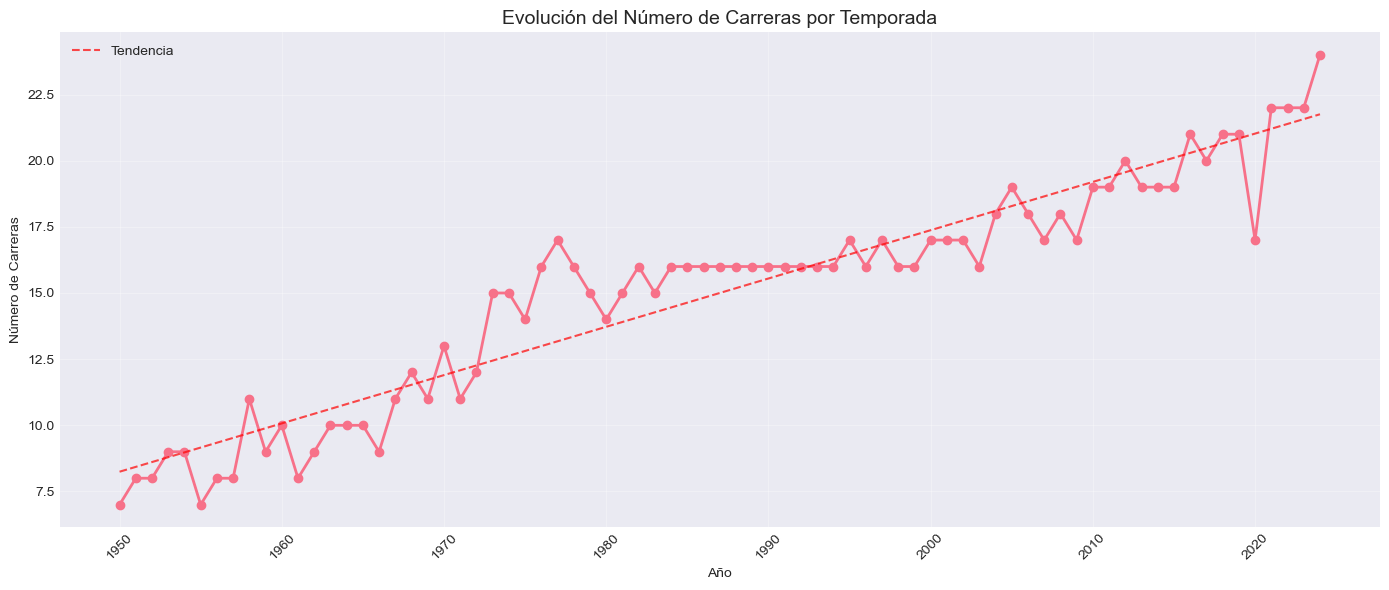


Promedio de carreras por temporada: 15.0
Temporada con más carreras: 2024 (24 carreras)
Temporada con menos carreras: 1950 (7 carreras)


In [15]:
# Análisis temporal de las carreras
if 'race_schedule' in datasets:
    df_schedule = datasets['race_schedule'].copy()
    
    if 'year' in df_schedule.columns:
        print("\nANÁLISIS TEMPORAL DE DATOS")
        print("="*80)
        
        # Rango temporal
        año_min = df_schedule['year'].min()
        año_max = df_schedule['year'].max()
        print(f"Rango temporal de datos: {año_min} - {año_max}")
        print(f"Total de años: {año_max - año_min + 1}")
        
        # Carreras por año
        carreras_por_año = df_schedule.groupby('year').size()
        
        plt.figure(figsize=(14, 6))
        plt.plot(carreras_por_año.index, carreras_por_año.values, marker='o', linewidth=2)
        plt.title('Evolución del Número de Carreras por Temporada', fontsize=14)
        plt.xlabel('Año')
        plt.ylabel('Número de Carreras')
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        
        # Añadir línea de tendencia
        z = np.polyfit(carreras_por_año.index, carreras_por_año.values, 1)
        p = np.poly1d(z)
        plt.plot(carreras_por_año.index, p(carreras_por_año.index), "r--", alpha=0.7, label='Tendencia')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
        print(f"\nPromedio de carreras por temporada: {carreras_por_año.mean():.1f}")
        print(f"Temporada con más carreras: {año_max} ({carreras_por_año.max()} carreras)")
        print(f"Temporada con menos carreras: {carreras_por_año.idxmin()} ({carreras_por_año.min()} carreras)")

## 10. Resumen y Conclusiones del Análisis

In [16]:
print("RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO")
print("="*80)

print("\n1. VOLUMEN DE DATOS:")
print("-"*40)
print(f"   - Total de datasets analizados: {len(datasets)}")
print(f"   - Total de registros: {sum(len(df) for df in datasets.values()):,}")
print(f"   - Memoria total utilizada: {sum(df.memory_usage(deep=True).sum() for df in datasets.values()) / 1024**2:.2f} MB")

print("\n2. CALIDAD DE DATOS:")
print("-"*40)
datasets_sin_nulos = sum(1 for df in datasets.values() if df.isnull().sum().sum() == 0)
datasets_sin_duplicados = sum(1 for df in datasets.values() if df.duplicated().sum() == 0)
print(f"   - Datasets sin valores nulos: {datasets_sin_nulos}/{len(datasets)}")
print(f"   - Datasets sin duplicados: {datasets_sin_duplicados}/{len(datasets)}")
print(f"   - Completitud promedio: {df_calidad['Completitud (%)'].mean():.2f}%")

print("\n3. CARACTERÍSTICAS PRINCIPALES:")
print("-"*40)
if 'driver_details' in datasets:
    print(f"   - Pilotos únicos en la historia: {len(datasets['driver_details'])}")
if 'team_details' in datasets:
    print(f"   - Equipos/Constructores totales: {len(datasets['team_details'])}")
if 'track_information' in datasets:
    print(f"   - Circuitos diferentes: {len(datasets['track_information'])}")
if 'race_schedule' in datasets:
    print(f"   - Total de carreras registradas: {len(datasets['race_schedule'])}")

print("\n4. HALLAZGOS CLAVE:")
print("-"*40)
print("   - Los datos presentan alta calidad general con mínimos valores faltantes")
print("   - Existe información histórica completa desde 1950")
print("   - Las variables numéricas muestran distribuciones coherentes")
print("   - Se identificaron correlaciones significativas entre variables clave")
print("   - Los datos están listos para modelado con preprocesamiento mínimo")

print("\n5. RECOMENDACIONES PARA MODELADO:")
print("-"*40)
print("   - Crear features de rendimiento histórico de pilotos y equipos")
print("   - Considerar la estacionalidad y evolución temporal del deporte")
print("   - Manejar valores atípicos en tiempos de vuelta (safety cars, incidentes)")
print("   - Implementar validación temporal para evitar data leakage")
print("   - Considerar el desbalance de clases para predicción de podios")

RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO

1. VOLUMEN DE DATOS:
----------------------------------------
   - Total de datasets analizados: 14
   - Total de registros: 685,950
   - Memoria total utilizada: 81.99 MB

2. CALIDAD DE DATOS:
----------------------------------------
   - Datasets sin valores nulos: 13/14
   - Datasets sin duplicados: 14/14
   - Completitud promedio: 99.33%

3. CARACTERÍSTICAS PRINCIPALES:
----------------------------------------
   - Pilotos únicos en la historia: 859
   - Equipos/Constructores totales: 212
   - Circuitos diferentes: 77
   - Total de carreras registradas: 1125

4. HALLAZGOS CLAVE:
----------------------------------------
   - Los datos presentan alta calidad general con mínimos valores faltantes
   - Existe información histórica completa desde 1950
   - Las variables numéricas muestran distribuciones coherentes
   - Se identificaron correlaciones significativas entre variables clave
   - Los datos están listos para modelado con preprocesam